# Logistic Regression in Python
# Part 1 - Exploring the data and building the model

## Import packages and read data
---


In [1]:
# Import the required packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn.metrics as metrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
df = pd.read_csv("../datasets/student_pass.csv")

## Data Exploration
---
Familiarise yourself with the data (shape of the data, basic summary, correlation etc.)

In [3]:
df.head()

,Student,Hours_Studied,Hours_Slept,Pass
0,1,8.5,8.9,1
1,2,5.8,5.7,0
2,3,7.0,5.7,0
3,4,9.5,8.0,1
4,5,8.7,5.8,1


In [2]:
# Create as much data cells as you need to familiarise yourself with the data.
df.describe()

,Student,Hours_Studied,Hours_Slept,Pass
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,5.121000,7.079000,0.530000
std,29.011492,2.025808,1.034779,0.501614
min,1.000000,0.000000,4.800000,0.000000
25%,25.750000,3.700000,6.300000,0.000000
50%,50.500000,5.150000,7.000000,1.000000
75%,75.250000,6.500000,7.825000,1.000000
max,100.000000,9.500000,9.400000,1.000000


There are 100 students and not missing data. Nothing in the descriptive statistics raises alarms about the data.

Text(0, 0.5, 'Passed Exam')

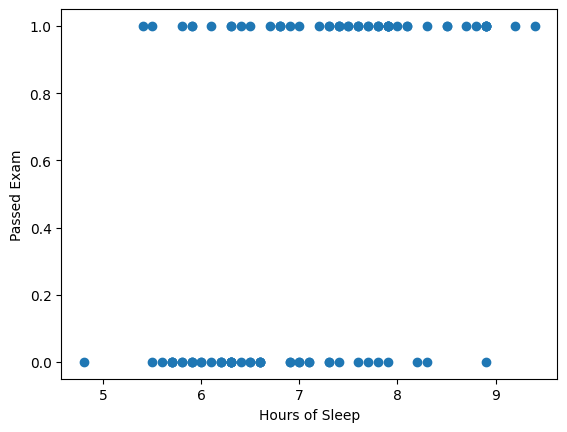

In [10]:
# plot a scatter plot of 'Hours Slept' vs 'Pass'
plt.scatter(
    df['Hours_Slept'],
    df['Pass']
)
plt.xlabel('Hours of Sleep')
plt.ylabel('Passed Exam')

The scattergraph of hourse slept with exam outcome appears to imply that more hours of sleep gives a higher chance of passing the exam. The points at y = 1 (pass) appear to have larger x-values than the points at y = 0 (fail). 

<Axes: >

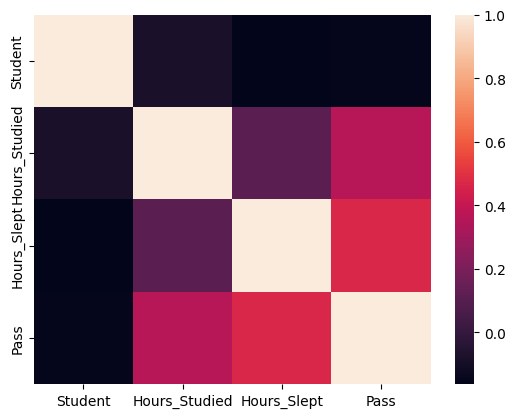

In [11]:
# plot a heatmap of correlations with seaborn 
sns.heatmap(df.corr())

This heatmap shows no correlation between any variable and student number (as expected).

There does apear to be a weak correlation (≈ 0.2) between the two independent vaiables of hours slept and hours studies. It is good the coorelation is not strong as this could skew the results. We should be fine to move ahead with both variables. I have plotted these variables below. 

Both independent variables appear to have medium correlations with passing, with hours slept having the higher correlation.

Text(0, 0.5, 'Hours Studied')

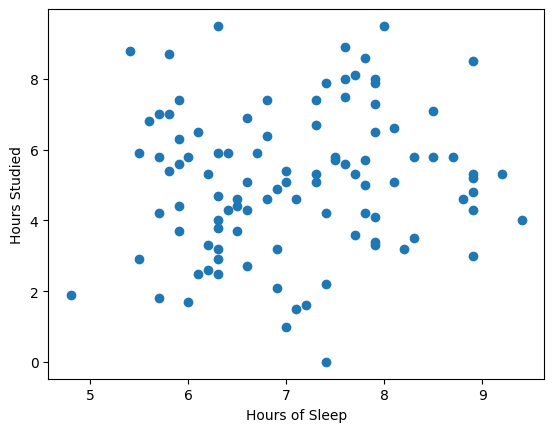

In [14]:
plt.scatter(
    df['Hours_Slept'],
    df['Hours_Studied']
)
plt.xlabel('Hours of Sleep')
plt.ylabel('Hours Studied')

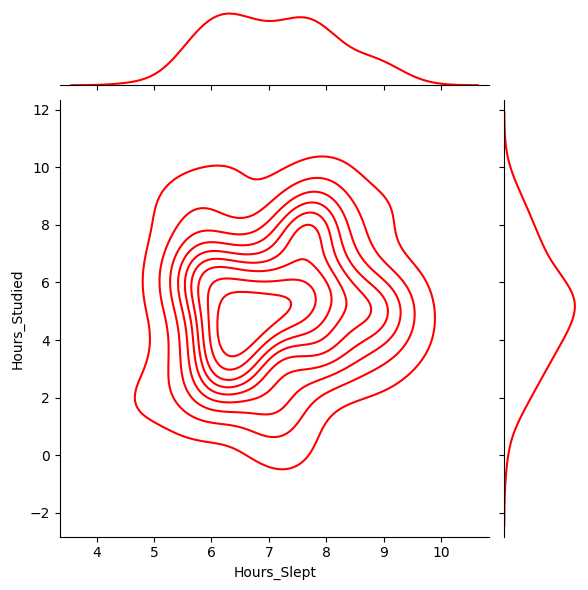

In [12]:
sns.jointplot(x='Hours_Slept', y='Hours_Studied', data=df, kind='kde', color='red')

Hours studies has a smooth roughly symetrical peak that tapers steadily towards outliers. This kde (kernal density estimate) graph doesn't appear to be a good way to display this information as it implies some negative values of hours studied which is impossible. 

The hours slept distribution is more lumpy with the central value not being the most frequent, there is a peak either side of it. 

Below I have plotted a simple jointplot which is a better visualiser for this dataset.

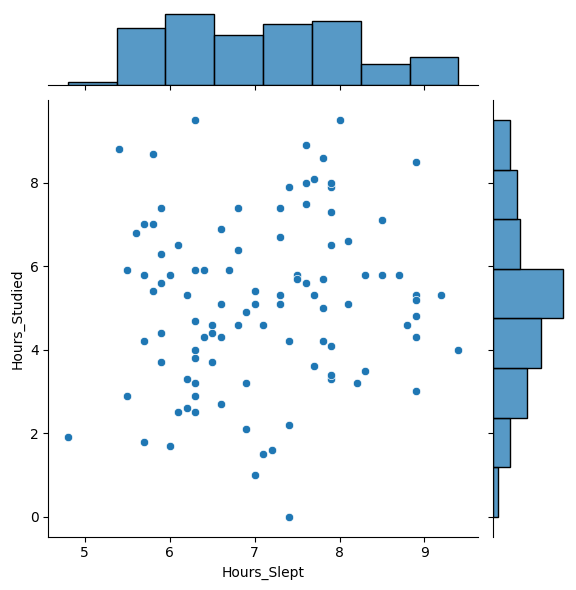

In [13]:
sns.jointplot(x='Hours_Slept', y='Hours_Studied', data=df)

## Split the DataFrame into train and test data
---

In [15]:
# Split the data into train and test sets

train, test = train_test_split(
    df,
    random_state = 13 # this ensures that we get the same answer each time
)

## Train the model
---

In [16]:
# Identify dependent and independent variables
dependent_var = train['Pass']
independent_vars = train[['Hours_Slept','Hours_Studied']]
independent_vars = sm.add_constant(independent_vars)

In [17]:
# Build the model
model = sm.Logit(
    dependent_var,
    independent_vars
).fit()

Optimization terminated successfully.
         Current function value: 0.505466
         Iterations 6


In [18]:
# Print model summary statistics

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Pass   No. Observations:                   75
Model:                          Logit   Df Residuals:                       72
Method:                           MLE   Df Model:                            2
Date:                Mon, 19 Jun 2023   Pseudo R-squ.:                  0.2699
Time:                        13:42:13   Log-Likelihood:                -37.910
converged:                       True   LL-Null:                       -51.926
Covariance Type:            nonrobust   LLR p-value:                 8.183e-07
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -10.4435      2.443     -4.275      0.000     -15.231      -5.656
Hours_Slept       1.2519      0.321      3.903      0.000       0.623       1.881
Hours_Studied     0.3491      0.164      2.125      0.034       0.027       0.671
=================================================================================
"""

The model gives the logistic function:

      y = 1/(1 + e^(-logit))

where:

      logit = -10.4435 + 1.2519 * x1 + 0.3491 * x2

where: 

      x1 is Hours_Slept

      x2 is Hours_Studied

The log-likelihood value of -37.910 is not good but does not soley represent 'goodness of fit'.

The LL-Null value of -51.926 is low which is good but not conclusive.

The Pseudo R-squared value of 0.2699 could indicate a good fit.

## Logit function
---

### Is the model a good fit?


To understand if a model can be used to make a prediction we need to look at additional elements of the Logit Regression results:
- **coef** : the coefficients of the independent variables in the regression equation.
<br>
- **Log-Likelihood** : the natural logarithm of the Maximum Likelihood Estimation(MLE) function. MLE is the optimization process of finding the set of parameters that result in the best fit. 
    - A higher (non-negative) number is better, but does not soley represent 'goodness of fit'.
<br>
- **LL-Null** : the value of log-likelihood of the model when no independent variable is included(only an intercept is included).
     - In general, a larger LL-Null value indicates a worse fit, while a smaller value indicates a better fit. But the meaningful interpretation lies in comparing the LL-Null value to the log-likelihood values of other models being considered.
<br>
- **Pseudo R-squ.** : a substitute for the R-squared value in Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model.
     - These R-squared measures provide an indication of how much of the variation in the response variable is explained by the model. 

## Predict data for the test set and compare
---

In [21]:
# Predict the model results on the test data

predicted = model.predict(
    sm.add_constant(test[['Hours_Slept','Hours_Studied']])
)

In [23]:
# explre the predicted data
predicted.head(5)


37    0.657570
62    0.653231
83    0.022507
14    0.500922
43    0.898220
dtype: float64

In [24]:
# explore the test 'Pass' data
test['Pass'].head()

37    1
62    1
83    0
14    1
43    1
Name: Pass, dtype: int64

A quick look at the top 5 rows is encouraging. All of the predicted values greater than 0.5 correspond to passes (1s) in the test data. 

# Part 2 - Model Validation


## Validating our model
---
Validating a logistic regression model involves assessing how well the model fits the data and how well it can predict outcomes for new data. Here are some common methods for model validation:
- Confusion Matrix, True Positive and True Negative Rate
- Area Under the Curve (AUC)
- Receiver Operating Characteristic curve (ROC)


### Confusion Matrix

In [25]:
# We use 0.5 as the threshold
predicted_labels = predicted > 0.5  

# Generate confusion matrix
cm = metrics.confusion_matrix(test['Pass'], predicted_labels)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 6  5]
 [ 4 10]]


There are 11 fails and 14 passes in our test set of data. 

About half of the negatives were corrrectly predicted.

About two thirds of positives were corrrectly predicted.

In [35]:
print('Number of passes in training data: ',len(train.loc[train['Pass'] == 1]))
print('Number of fails in training data: ',len(train.loc[train['Pass'] == 0]))

Number of passes in training data:  39
Number of fails in training data:  36


There are approximately equal pass and fail datapoints in the training data so it doesn't seem like a lack of data can explain the inaccuracy of the model for fails. 

### True Positive Rate and True Negative Rate

In [26]:
# Calculate TPR and TNR
TN, FP, FN, TP = cm.ravel()

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
print(TN)
print(FN)
print(FP)
print(TP)
print(f"True Positive Rate (TPR): {TPR}")
print(f"True Negative Rate (TNR): {TNR}")

6
4
5
10
True Positive Rate (TPR): 0.7142857142857143
True Negative Rate (TNR): 0.5454545454545454


The TPR and TNR indicate that while the model gets a correct positive (pass) value about 70% of the time only half of the negative values are correct. This is approximately the same as random chance. The model appears to have some luck at predicting passes but is not useful for predicting fails. 

### AUC score

In [27]:
# Calculate the AUC Score

metrics.roc_auc_score(test['Pass'],predicted)

0.7857142857142857

### ROC curve

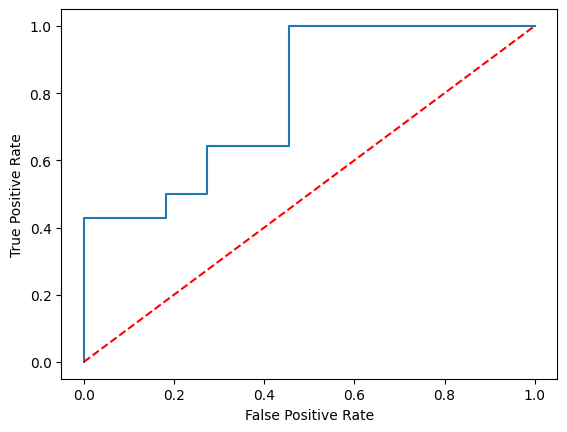

In [28]:
# Plot the ROC Curve

fpr, tpr, _ = metrics.roc_curve(test['Pass'],predicted)

plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The fit appears to be somewhere between a bad and medium fit. 

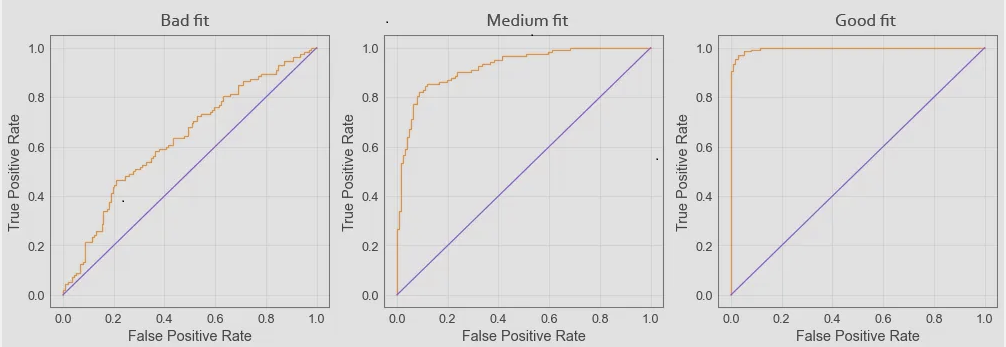

## Making a prediction
---
# calculate the log odds
logit = const + coef_studied * hours_studied + coef_slept * hours_slept

# transform the log odds into a probability
P = 1 / (1 + np.exp(-logit))


In [32]:
# Making a prediction, 
new_data = [[1, 7, 8]]  

# Make the prediction
predicted_values = model.predict(sm.add_constant(new_data))
val = predicted_values[0]
print("The predicted value is: ", val)

if val >= 0.5:
    print('It is most likely the student will pass according to our model.')
else:
    print('It is most likely the student will fail according to our model.')


The predicted value is:  0.7525584136397657
It is most likely the student will pass according to our model.
